In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/musaidriss/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# filter for the job titles and country
df_UK = df[(df['job_country'] == 'United Kingdom')].dropna(subset=['salary_year_avg'])
# .dropna Remove rows where 'salary_year_avg' is missing (NaN) and This ensures salary-based analysis and plots are accurate

In [3]:
df_UK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1107,Data Scientist,"Data Scientist, Customer AI Engineering","London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-06-20 13:12:50,False,False,United Kingdom,year,157500.0,NaN,Tractable,"[python, numpy, pandas, scikit-learn]","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
2602,Data Analyst,Admin & Data Analyst,United Kingdom,via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-10 13:55:49,False,False,United Kingdom,year,51014.0,NaN,Catch22,"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
9778,Senior Data Analyst,Workday HCM Senior Data Analyst (18 month FTC),"London, UK",via Ai-Jobs.net,Contractor,False,United Kingdom,2023-07-10 13:36:15,True,False,United Kingdom,year,111175.0,NaN,WPP,"[vba, python, r, oracle, sap, excel]","{'analyst_tools': ['sap', 'excel'], 'cloud': [..."
9903,Senior Data Engineer,Senior Satellite Analytics Data Engineer,"Edinburgh, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-08-10 13:34:53,False,False,United Kingdom,year,147500.0,NaN,Verisk,"[python, sql, nosql, mongodb, mongodb, elastic...","{'cloud': ['aws'], 'databases': ['mongodb', 'e..."
13764,Data Scientist,Programmatic Data Specialist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 13:22:50,False,False,United Kingdom,year,109500.0,NaN,Publicis Groupe,"[excel, powerpoint, flow]","{'analyst_tools': ['excel', 'powerpoint'], 'ot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781461,Data Scientist,Data Scientist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-04-04 06:31:10,False,False,United Kingdom,year,88128.0,NaN,Kuda Technologies Ltd,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
783284,Senior Data Scientist,Senior Data Scientist,"Belfast, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-28 06:14:36,False,False,United Kingdom,year,157500.0,NaN,Axiom,"[sql, r, python, aws, redshift, spark, gitlab,...","{'async': ['jira', 'confluence'], 'cloud': ['a..."
783436,Data Scientist,Insight Analyst,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 06:36:08,True,False,United Kingdom,year,72900.0,NaN,Xiatech,"[html, python, css, javascript, sql, bigquery,...","{'analyst_tools': ['tableau'], 'async': ['jira..."
783598,Data Engineer,Data Engineer,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-05-02 06:18:42,False,False,United Kingdom,year,96773.0,NaN,Prevail,"[python, java, scala, c#, r, redshift, aws]","{'cloud': ['redshift', 'aws'], 'programming': ..."


In [4]:
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles and isin says if job title in top 6 keep it in otherwise remove
df_UK_top6 = df_UK[df_UK['job_title_short'].isin(job_titles)]

# order the job titles by median salary. Get rid of .index for list with values 
job_order = df_UK_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

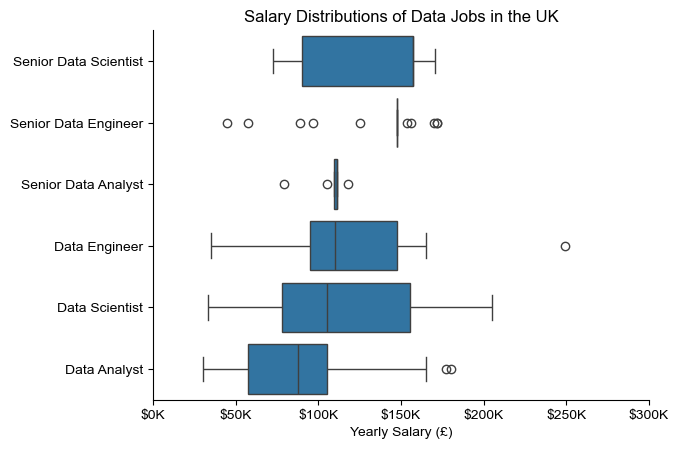

In [5]:
sns.boxplot(data=df_UK_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the UK')
plt.xlabel('Yearly Salary (£)')
plt.ylabel('')
plt.xlim(0, 300000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.savefig("salary_distrubtion_uk.png", dpi=300, bbox_inches="tight")
plt.show()

In [6]:
df_UK_top6.groupby('job_title_short')['salary_year_avg'].describe()

,count,mean,std,min,25%,50%,75%,max
job_title_short,,,,,,,,
Data Analyst,72.0,89410.916667,36169.213672,30000.0,57500.000,87750.0,105000.0,180000.0
Data Engineer,60.0,115622.200000,36960.290927,35000.0,95070.375,110000.0,147500.0,249000.0
Data Scientist,75.0,110250.933333,40655.832456,33488.5,77925.000,105300.0,155750.0,205000.0
Senior Data Analyst,8.0,107314.375000,11869.481105,79200.0,109706.250,111175.0,111175.0,118140.0
Senior Data Engineer,24.0,137550.020833,32637.885062,45000.0,147500.000,147500.0,147500.0,171620.0
Senior Data Scientist,31.0,129399.225806,35044.184206,72500.0,89885.000,157500.0,157500.0,170575.0


## Investigate Median Salary VS Skill for Data Analysts

In [7]:
# Only get data analyst jobs in the UK
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

df_DA_UK = df_DA_UK.explode('job_skills')

df_DA_UK[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter
...,...,...
771595,111175.0,sql
771595,111175.0,excel
771595,111175.0,sheets
771595,111175.0,looker


In [8]:
# Determine the highest paid skills and most demanded skills

df_DA_top_pay =  df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
c++,1,177283.0
numpy,1,177283.0
tensorflow,1,177283.0
pytorch,1,177283.0
pandas,1,177283.0
aurora,1,165000.0
kafka,1,165000.0
aws,3,165000.0
mysql,3,165000.0


In [9]:
df_DA_skills = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills


,count,median
job_skills,,
tableau,13,100500.0
sql,33,98500.0
looker,6,96012.5
power bi,7,89100.0
python,25,89100.0
sas,8,80007.0
r,9,77017.5
excel,29,75550.0
go,9,71000.0


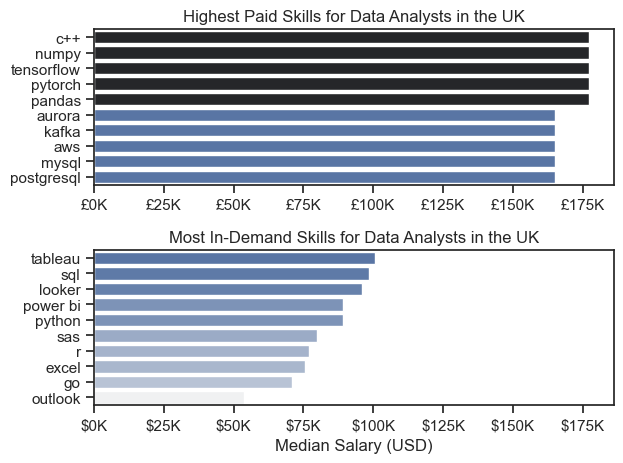

In [11]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the UK')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the UK')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.savefig("highest_paid_skills_Data_Analyst_uk.png", dpi=300, bbox_inches="tight")
plt.show()